# Download the data

In [1]:
# https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
# !kaggle datasets download -d sakshigoyal7/credit-card-customers
# ls
# !unzip credit-card-customers.zip

# Read the data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [4]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


# Columns description

- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable, Existing Customer or Attrited Customer
- Customer_Age - Demographic variable - Customer's Age in Years
- Gender - Demographic variable - M=Male, F=Female
- Dependent_count - Demographic variable - Number of dependents
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
- Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count - Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon - No. of Contacts in the last 12 months
- Credit_Limit - Credit Limit on the Credit Card
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1) 
- Total_Trans_Amt - Total Transaction Amount (Last 12 months)
- Total_Trans_Ct - Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1) 
- Avg_Utilization_Ratio - Average Card Utilization Ratio

Your goal is to predict whether the client will churn or not. 

# 1. What is the target column?

- **Attrition_Flag**
- Marital_Status
- Gender
- Months_on_book
- Avg_Utilization_Ratio

# 2. Transform target column

Transform target column to 1/0 format, 1 if the client will churn, 0 otherwise. What is the percetange of churned customers?

- 53%
- 84%
- **16%**
- 47%

In [5]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

df['Attrition_Flag'].mean() * 100

16.065962279055988

# Drop `CLIENTNUM` column, as all clients are unique

In [6]:
df = df.drop('CLIENTNUM', axis=1)

# 3. Analyse columns, which are numerical, which are categorical?

How many numerical and categorical columns do you have (excluding target variable)

- **5 categorical columns and 14 numerical**
- 5 numerical columns and 14 categorical
- 4 categorical and 15 numerical
- 4 numerical and 15 categorical

In [7]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
len(df.dtypes[df.dtypes == object].index), len(df.dtypes[(df.dtypes == int) + (df.dtypes == float)].index) - 1

(5, 14)

# 4. Perform EDA (optional)

Plot 1-5 Graphs looking for interesting data patterns. Each graph must contain a short description. You can use ChatGPT to generate ideas for graphs. If you use ChatGPT include your prompt into the document. Each of 5 graphs worth 1 point.

Checklist:
1. For each graph:
    1. Graph
        - has title
        - has labels for OX and OY 
        - has legend
    2. Graph description (<100 words)
    3. ChatGPT prompt included (if you've used one)
2. All graphs in a single pdf document

Put all graphs into a single doc file, save it as pdf and upload to the google form. For reference, this whole text is 105 words.

#  5. What are the different ways to handle categorical columns?

select all that apply

- **Ordinal Encoding**
- **One-Hot Encoding**
- Delete all categorical columns
- Replace categorical values with column averages
- Replace all categorical values to NULL

Before training machine learning algorithm we need to convert categorical columns



# 6. Encode categorical columns with 1-hot encoding

How many binary columns after encoding do you have? Use `OneHotEncoder` from `slearn.preprocessing` module with `sparse=False` parameter. See example below.

- **23**
- 2
- 5
- 18

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
encoder = OneHotEncoder(sparse=False)
encoder.fit(df[categorical_columns])
cat_encoded = encoder.transform(df[categorical_columns],)
df_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Check the resulting DataFrame
df_encoded.head()

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Drop original categorical columns and concat encoded with the numerical columns

assuming your encoded columns are in `df_encoded` variable

In [11]:
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, df_encoded], axis=1)

# 7. Split data intro train and test parts

Set the size of the test set to 30%, use startification over the target column (to preserve target ratio in train and test sets). Use `random_state=10`. How many observations do you have in your test set?

- 2551
- **3039**
- 1139
- 7088

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Attrition_Flag'], random_state=10)
df_test.shape

(3039, 38)

# 8. This is a binary classification problem with  imbalanced classes, what are the appropriate metrics for this task?

select all which apply

- accuracy score
- **roc auc score**
- **f1 score**
- mean absolute error
- r-squared
- **precision**

# 9. Train a Random Forest Classifier on a `train` set

Use RandomForestClassifier with default hyperparameters. What is the f1 score of a trained model on a test set?

- between 0.80 and 0.85
- between 0.85 and 0.90
- between 0.90 and 0.95
- between 0.95 and 1.0

**Correct answer depends on your random states, checked via ipynb**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [15]:
rf = RandomForestClassifier()
rf.fit(df_train.drop('Attrition_Flag', axis=1), df_train['Attrition_Flag'])

y_pred_rf = rf.predict_proba(df_test.drop('Attrition_Flag', axis=1))
y_pred_rf_train = rf.predict_proba(df_train.drop('Attrition_Flag', axis=1))

In [16]:
# On Test set
f1_score(df_test['Attrition_Flag'], y_pred_rf[:, 1]>0.5)

0.8299776286353467

In [17]:
# On Train set
f1_score(df_train['Attrition_Flag'], y_pred_rf_train[:, 1]>0.5)

1.0

# 10. Build a confusion matrix with a default probability threshold (0.5)

To analyse the resulting algorithm we will take a closer look on individual predictions. How many False Positives and False Negatives do you have?

- 29, 114
- 114, 29
- 374, 114
- 29, 374
- Other

**Correct answer depends on your random states, checked via ipynb, though number of FP should be smaller than number of FN.**

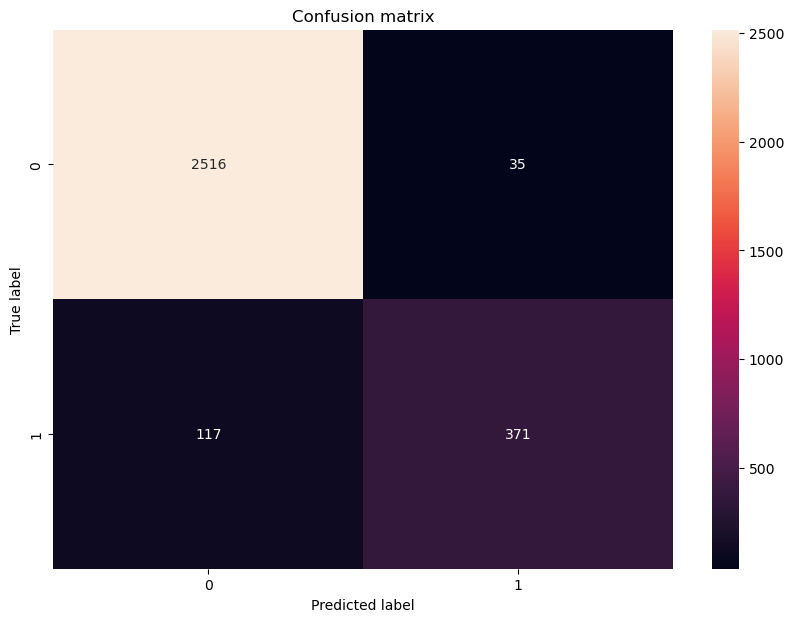

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>0.5)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label');

# 11. We will change probability threshold from 0.05 to 0.95 with step 0.05

What happens to the number of True Positives and to the number of False Negatives, as you increase the probability threshold?

- As we increase the probabilty threshold our predictions become more liberal (predict Churn for observations with smaller probability), therefore Number of TP decreases and number of FN increases
- **As we increase the probability threshold our predictions become more conservative (predict Churn only for observations with high probability), therefore Number of TP decreases and number of FN increases**
- As we increase the probability threshold our predictions become more conservative (predict Churn only for observations with high probability), therefore Number of TP increases and number of FN decreases
- As we increase the probabilty threshold our predictions become more liberal (predict Churn for observations with smaller probability), therefore Number of TP increases and number of FN decreases

In [19]:
import numpy as np

In [20]:
true_positives = []
false_negatives = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>t)
    tp, fn = cm[1,1], cm[1,0]
    true_positives.append(tp)
    false_negatives.append(fn)

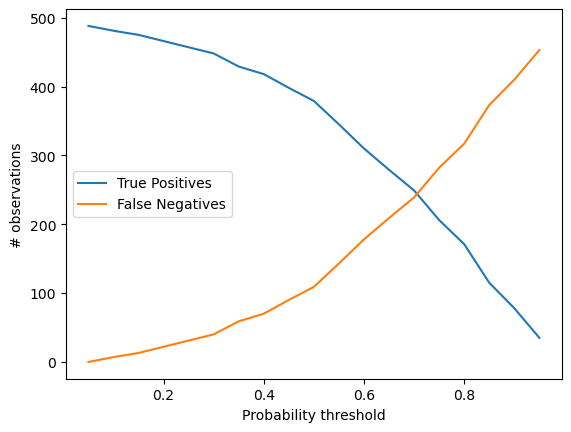

In [21]:
plt.plot(np.linspace(0.05,0.95,19), true_positives, label='True Positives')
plt.plot(np.linspace(0.05,0.95,19), false_negatives, label='False Negatives')
plt.xlabel('Probability threshold')
plt.ylabel('# observations')
plt.legend();

# 12. Estimate revenue

Let's consider a toy economic setup:
1. Each client earns a company $50\$$ per month
2. If you predict that a client will churn, the company can provide she with a discount of $200\$$ and the client will stay for another year

If the company do nothing (has no Churn model), then the revenue over the year will be:

$$S = N*50*12 + P*0$$

where N (negative) is number of non-Churn clients, and P (positive) is number of clients who Churn. If the company implements some Churn model, the revenue will be the following:

$$S = TN*50*12 + FP*(50*12-200) + TP*(50*12-200)  + FN * 0$$

where 
- TN are non-Churning clients, predicted as non-Churning (true negatives)
- FP are non-Churning clients, predicted as Churning (false positives)
- TP are Churning clients, predicted as Churning (true positives)
- FN are Churning clients, predicted as non-Churning (false negatives)

## Compute the revenue for different thresholds based on your model, what is the optimal probability threshold? Report two numbers divided by a comma, e.g. `0.5,1500000`

In [22]:
profit = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-200) + tp*(50*12-200) 
    profit.append(S)

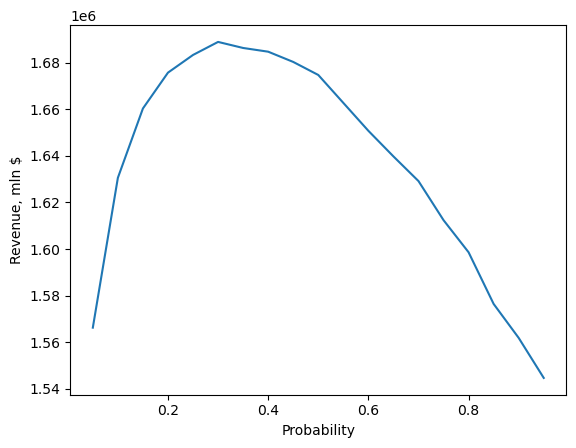

In [23]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [24]:
np.max(profit)

1689000

In [25]:
np.linspace(0.05,0.95,19)[np.argmax(profit)]

0.3

# 13. Compute economic value

Is there any economic value from introducing a ML model (compared to not using a model and not providing a discounts)?

First scenario - no ML model, no discounts; Second scenario - ML model from question 12.

- There is no economic value (using current model), as the revenue is smaller in the second scenario.
- There is a possible economic value (using current model), as the revenue is smaller in the second scenario.
- **There is a possible economic value (using current model), as the revenue is larger in the second scenario.**

In [26]:
((df_test['Attrition_Flag'].values-1)*(-1)*50*12).sum()

1530600

In [27]:
1552800 - 1530600

22200

In [28]:
22200/1554800

0.014278363776691536

# 14. Build a confusion matrix

assosiated with an optimal probability threshold. What happend to the number of False Positives and False Negatives, compared to the default probability threshold (question 10)?

- Nothing happend
- Since we decreased probability threshold number of FP goes up, number of FN goes down
- Since we increased probability threshold number of FP goes up, number of FN goes down
- Since we decreased probability threshold number of FP goes down, number of FN goes up
- Since we increased probability threshold number of FP goes down, number of FN goes up

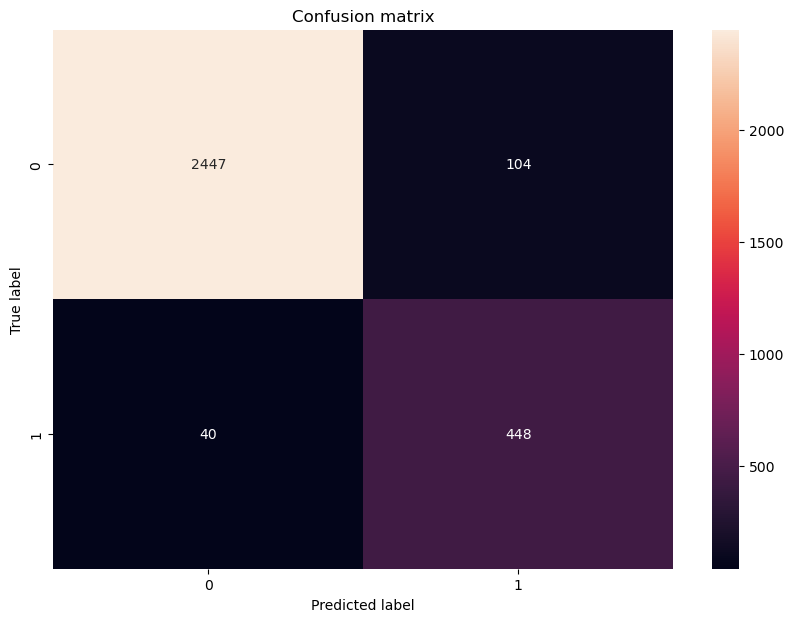

In [29]:
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>0.3)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 15. What if the price to keep the client goes up to 500?

Does optimal probability treshold changes?

- **Yes, goes up, because the cost of keeping the client went up, thus, the cost of FP goes up**
- Yes, goes down, because the cost of keeping the client went up, thus, the cost of FP goes down
- No, stays the same, because the ML model stays the same
- No, stays the same, because the revenue from each client stays the same (50$)

In [30]:
profit = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-500) + tp*(50*12-500) 
    profit.append(S)

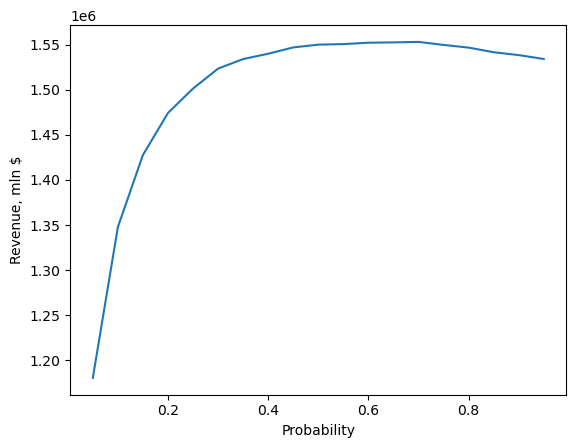

In [31]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [32]:
max(profit)

1553000

In [33]:
np.linspace(0.05,0.95,19)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

# 16. Built an assosiated confusion matrix

How many False Positives and False Negatives do you have?

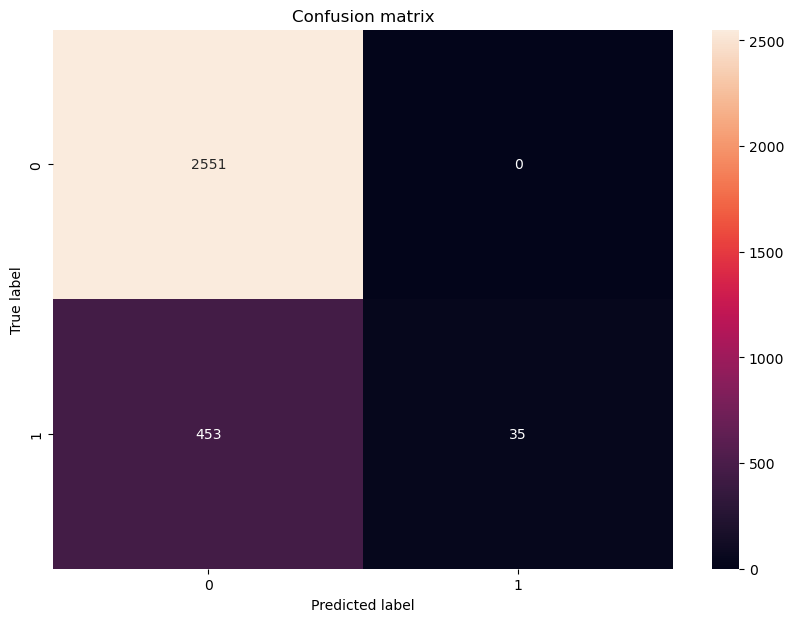

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 17. Compare confusion matrices from 14 and 16




# 18. Train catboost

Train a catboost.CatBoostClassifier on a **unprocessed data** (no preprocessing for categorical columns) with default hyperparameters, see example below.

In [37]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [39]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

In [40]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Attrition_Flag'])

In [41]:
categorical_columns = ['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [42]:
clf = CatBoostClassifier()
clf.fit(df_train.drop('Attrition_Flag', axis=1), df_train['Attrition_Flag'], cat_features=categorical_columns)

y_pred = clf.predict_proba(df_test.drop('Attrition_Flag', axis=1))

Learning rate set to 0.023774
0:	learn: 0.6628596	total: 54.8ms	remaining: 54.8s
1:	learn: 0.6283660	total: 59.7ms	remaining: 29.8s
2:	learn: 0.6056438	total: 64.1ms	remaining: 21.3s
3:	learn: 0.5802655	total: 68.3ms	remaining: 17s
4:	learn: 0.5594904	total: 72.4ms	remaining: 14.4s
5:	learn: 0.5392257	total: 76.5ms	remaining: 12.7s
6:	learn: 0.5189720	total: 81.3ms	remaining: 11.5s
7:	learn: 0.4947299	total: 86.4ms	remaining: 10.7s
8:	learn: 0.4740398	total: 90.5ms	remaining: 9.96s
9:	learn: 0.4565019	total: 94.9ms	remaining: 9.4s
10:	learn: 0.4378216	total: 99.1ms	remaining: 8.91s
11:	learn: 0.4222865	total: 104ms	remaining: 8.54s
12:	learn: 0.4102623	total: 109ms	remaining: 8.24s
13:	learn: 0.3923745	total: 113ms	remaining: 7.94s
14:	learn: 0.3786338	total: 117ms	remaining: 7.66s
15:	learn: 0.3642086	total: 121ms	remaining: 7.44s
16:	learn: 0.3506988	total: 125ms	remaining: 7.23s
17:	learn: 0.3426638	total: 129ms	remaining: 7.04s
18:	learn: 0.3358046	total: 134ms	remaining: 6.91s
19:

174:	learn: 0.1013374	total: 804ms	remaining: 3.79s
175:	learn: 0.1010604	total: 808ms	remaining: 3.78s
176:	learn: 0.1006884	total: 813ms	remaining: 3.78s
177:	learn: 0.1003065	total: 817ms	remaining: 3.77s
178:	learn: 0.0999999	total: 821ms	remaining: 3.77s
179:	learn: 0.0997377	total: 825ms	remaining: 3.76s
180:	learn: 0.0992962	total: 830ms	remaining: 3.75s
181:	learn: 0.0987650	total: 834ms	remaining: 3.75s
182:	learn: 0.0986328	total: 838ms	remaining: 3.74s
183:	learn: 0.0983329	total: 842ms	remaining: 3.73s
184:	learn: 0.0979819	total: 846ms	remaining: 3.73s
185:	learn: 0.0978219	total: 850ms	remaining: 3.72s
186:	learn: 0.0975058	total: 854ms	remaining: 3.71s
187:	learn: 0.0970917	total: 858ms	remaining: 3.71s
188:	learn: 0.0968374	total: 862ms	remaining: 3.7s
189:	learn: 0.0966467	total: 866ms	remaining: 3.69s
190:	learn: 0.0965163	total: 870ms	remaining: 3.69s
191:	learn: 0.0962390	total: 874ms	remaining: 3.68s
192:	learn: 0.0960818	total: 878ms	remaining: 3.67s
193:	learn: 0

373:	learn: 0.0677969	total: 1.6s	remaining: 2.68s
374:	learn: 0.0677384	total: 1.6s	remaining: 2.67s
375:	learn: 0.0676104	total: 1.61s	remaining: 2.67s
376:	learn: 0.0675111	total: 1.61s	remaining: 2.66s
377:	learn: 0.0674230	total: 1.62s	remaining: 2.66s
378:	learn: 0.0673269	total: 1.62s	remaining: 2.65s
379:	learn: 0.0671455	total: 1.62s	remaining: 2.65s
380:	learn: 0.0670131	total: 1.63s	remaining: 2.64s
381:	learn: 0.0668614	total: 1.63s	remaining: 2.64s
382:	learn: 0.0668589	total: 1.64s	remaining: 2.63s
383:	learn: 0.0667401	total: 1.64s	remaining: 2.63s
384:	learn: 0.0666208	total: 1.64s	remaining: 2.63s
385:	learn: 0.0664861	total: 1.65s	remaining: 2.62s
386:	learn: 0.0662964	total: 1.65s	remaining: 2.62s
387:	learn: 0.0662020	total: 1.66s	remaining: 2.61s
388:	learn: 0.0660224	total: 1.66s	remaining: 2.61s
389:	learn: 0.0659438	total: 1.66s	remaining: 2.6s
390:	learn: 0.0659413	total: 1.67s	remaining: 2.6s
391:	learn: 0.0658424	total: 1.67s	remaining: 2.59s
392:	learn: 0.06

573:	learn: 0.0516468	total: 2.4s	remaining: 1.78s
574:	learn: 0.0515748	total: 2.4s	remaining: 1.77s
575:	learn: 0.0514845	total: 2.4s	remaining: 1.77s
576:	learn: 0.0513949	total: 2.41s	remaining: 1.77s
577:	learn: 0.0513949	total: 2.41s	remaining: 1.76s
578:	learn: 0.0512826	total: 2.42s	remaining: 1.76s
579:	learn: 0.0512078	total: 2.42s	remaining: 1.75s
580:	learn: 0.0511489	total: 2.42s	remaining: 1.75s
581:	learn: 0.0510504	total: 2.43s	remaining: 1.74s
582:	learn: 0.0509844	total: 2.43s	remaining: 1.74s
583:	learn: 0.0509184	total: 2.44s	remaining: 1.74s
584:	learn: 0.0508008	total: 2.44s	remaining: 1.73s
585:	learn: 0.0507266	total: 2.44s	remaining: 1.73s
586:	learn: 0.0506862	total: 2.45s	remaining: 1.72s
587:	learn: 0.0506500	total: 2.45s	remaining: 1.72s
588:	learn: 0.0506242	total: 2.46s	remaining: 1.71s
589:	learn: 0.0505703	total: 2.46s	remaining: 1.71s
590:	learn: 0.0505106	total: 2.47s	remaining: 1.71s
591:	learn: 0.0504393	total: 2.47s	remaining: 1.7s
592:	learn: 0.05

769:	learn: 0.0404993	total: 3.19s	remaining: 954ms
770:	learn: 0.0404289	total: 3.2s	remaining: 950ms
771:	learn: 0.0403837	total: 3.2s	remaining: 945ms
772:	learn: 0.0403224	total: 3.21s	remaining: 941ms
773:	learn: 0.0402396	total: 3.21s	remaining: 937ms
774:	learn: 0.0402296	total: 3.21s	remaining: 933ms
775:	learn: 0.0401902	total: 3.22s	remaining: 929ms
776:	learn: 0.0401472	total: 3.22s	remaining: 925ms
777:	learn: 0.0401055	total: 3.23s	remaining: 920ms
778:	learn: 0.0400651	total: 3.23s	remaining: 916ms
779:	learn: 0.0400439	total: 3.23s	remaining: 912ms
780:	learn: 0.0400306	total: 3.24s	remaining: 908ms
781:	learn: 0.0399730	total: 3.24s	remaining: 904ms
782:	learn: 0.0399396	total: 3.25s	remaining: 900ms
783:	learn: 0.0398909	total: 3.25s	remaining: 896ms
784:	learn: 0.0398673	total: 3.25s	remaining: 892ms
785:	learn: 0.0398415	total: 3.26s	remaining: 888ms
786:	learn: 0.0398117	total: 3.26s	remaining: 884ms
787:	learn: 0.0397260	total: 3.27s	remaining: 880ms
788:	learn: 0.

964:	learn: 0.0328651	total: 3.99s	remaining: 145ms
965:	learn: 0.0328541	total: 3.99s	remaining: 141ms
966:	learn: 0.0328379	total: 4s	remaining: 136ms
967:	learn: 0.0328240	total: 4s	remaining: 132ms
968:	learn: 0.0327624	total: 4.01s	remaining: 128ms
969:	learn: 0.0327023	total: 4.01s	remaining: 124ms
970:	learn: 0.0326727	total: 4.01s	remaining: 120ms
971:	learn: 0.0326159	total: 4.02s	remaining: 116ms
972:	learn: 0.0325888	total: 4.02s	remaining: 112ms
973:	learn: 0.0325797	total: 4.03s	remaining: 107ms
974:	learn: 0.0325551	total: 4.03s	remaining: 103ms
975:	learn: 0.0325340	total: 4.03s	remaining: 99.2ms
976:	learn: 0.0325173	total: 4.04s	remaining: 95.1ms
977:	learn: 0.0325081	total: 4.04s	remaining: 90.9ms
978:	learn: 0.0324289	total: 4.05s	remaining: 86.8ms
979:	learn: 0.0323904	total: 4.05s	remaining: 82.7ms
980:	learn: 0.0323407	total: 4.05s	remaining: 78.5ms
981:	learn: 0.0323170	total: 4.06s	remaining: 74.4ms
982:	learn: 0.0323007	total: 4.06s	remaining: 70.2ms
983:	learn

In [50]:
# On a Test set
roc_auc_score(df_test['Attrition_Flag'], y_pred[:, 1])

0.9961233460359485

# 19. Compute ROC AUC score for your RandomForest and Catboost model

Comment on how increase/decrease in roc auc (machine learning metric) compares with increase/decrease of revenue (business metric). Propose how you could improve the economic model to make it more realistic (and how to use your ML model in this new setup). Upload a pdf, up to 500 words.

In [44]:
y_pred[:, 1] > 0.5

array([ True,  True,  True, ..., False,  True,  True])

In [58]:
f1_score(df_test['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
}), y_pred[:, 1]<0.5)

0.9287211740041929

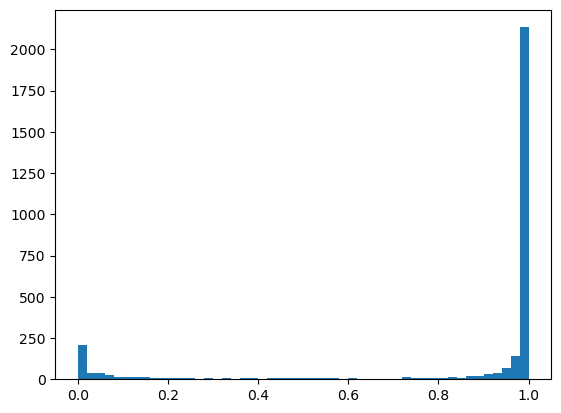

In [46]:
plt.hist(y_pred[:, 1],bins=50);